In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:

# 1. Load the data
df = pd.read_csv("Sample - Superstore.csv", encoding = 'latin-1')


In [5]:
# 2. Basic overview
print("\nFirst 5 rows:")
print(df.head())



First 5 rows:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0    

In [6]:
print("\nData Types:")
print(df.dtypes)


Data Types:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [7]:

print("\nDataset Shape:", df.shape)


Dataset Shape: (9994, 21)


In [8]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [9]:
print("\nSummary Statistics (numerical):")
print(df.describe())


Summary Statistics (numerical):
            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [10]:
print("\nSummary Statistics (categorical):")
print(df.describe(include=['object']))



Summary Statistics (categorical):
              Order ID Order Date   Ship Date       Ship Mode Customer ID  \
count             9994       9994        9994            9994        9994   
unique            5009       1237        1334               4         793   
top     CA-2017-100111   9/5/2016  12/16/2015  Standard Class    WB-21850   
freq                14         38          35            5968          37   

        Customer Name   Segment        Country           City       State  \
count            9994      9994           9994           9994        9994   
unique            793         3              1            531          49   
top     William Brown  Consumer  United States  New York City  California   
freq               37      5191           9994            915        2001   

       Region       Product ID         Category Sub-Category     Product Name  
count    9994             9994             9994         9994             9994  
unique      4             1862   

In [11]:

# 3. Check for duplicates
print("\nDuplicate rows count:", df.duplicated().sum())



Duplicate rows count: 0


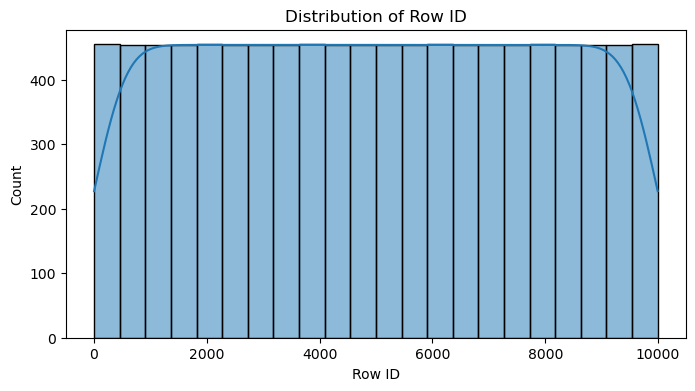

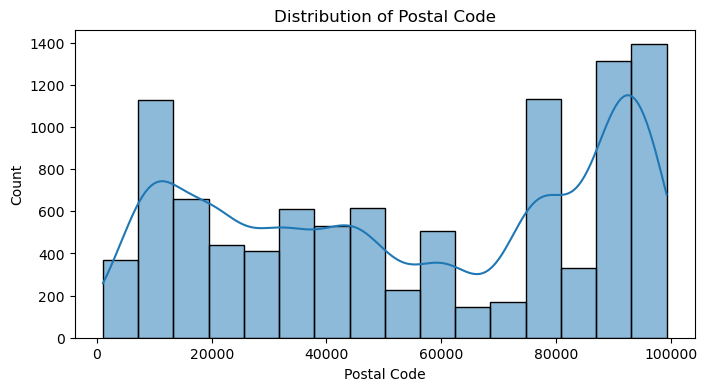

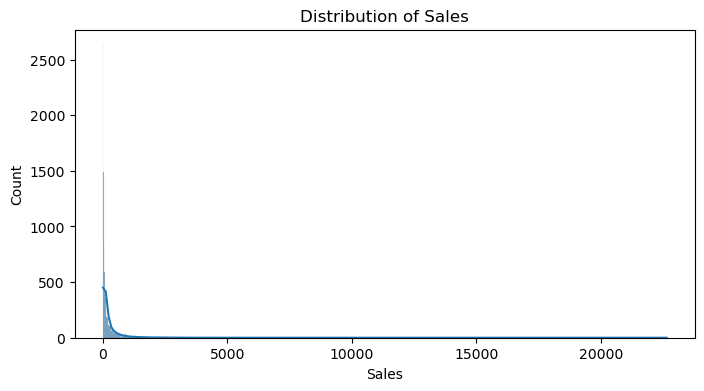

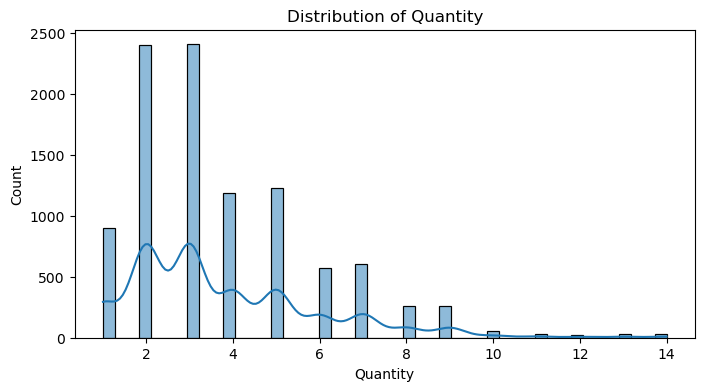

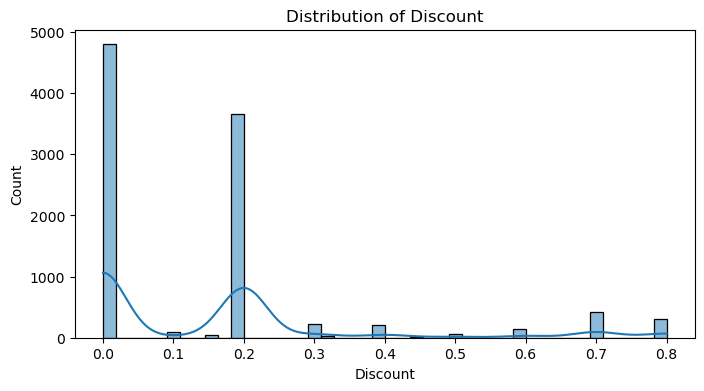

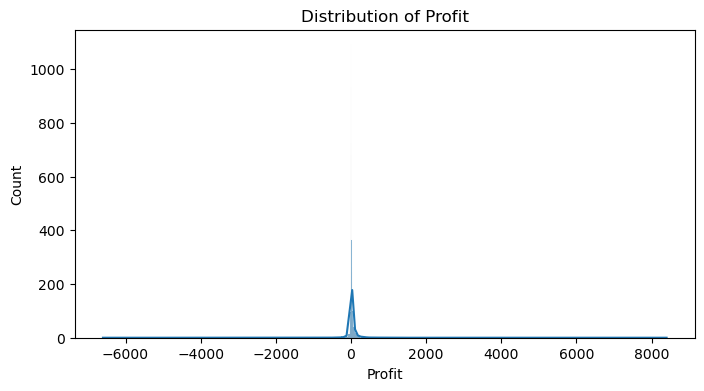

In [12]:
# 4. Univariate Analysis
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [13]:

# 5. Categorical Analysis
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for Order ID:
Order ID
CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
CA-2015-131338    10
                  ..
CA-2016-157259     1
CA-2017-107986     1
US-2015-112508     1
US-2016-126844     1
CA-2017-119914     1
Name: count, Length: 5009, dtype: int64

Value counts for Order Date:
Order Date
9/5/2016      38
9/2/2017      36
11/10/2016    35
12/1/2017     34
12/2/2017     34
              ..
2/25/2016      1
10/25/2016     1
2/21/2014      1
10/18/2016     1
1/21/2014      1
Name: count, Length: 1237, dtype: int64

Value counts for Ship Date:
Ship Date
12/16/2015    35
9/26/2017     34
12/6/2017     32
11/21/2017    32
9/6/2017      30
              ..
3/4/2014       1
2/11/2017      1
8/7/2016       1
4/8/2017       1
6/18/2015      1
Name: count, Length: 1334, dtype: int64

Value counts for Ship Mode:
Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64



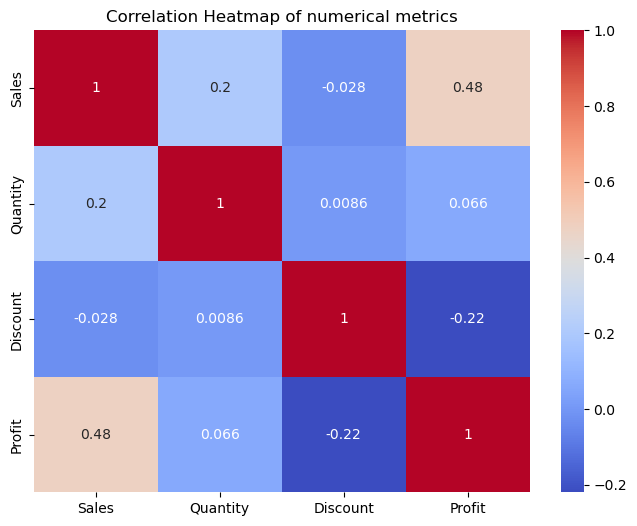

In [15]:
# Only select numeric columns that make sense
numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit']

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of numerical metrics")
plt.show()

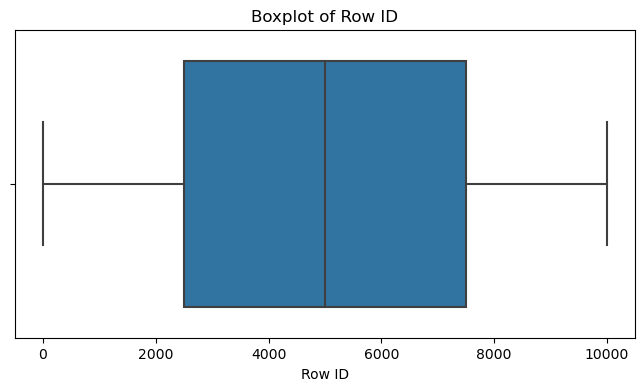

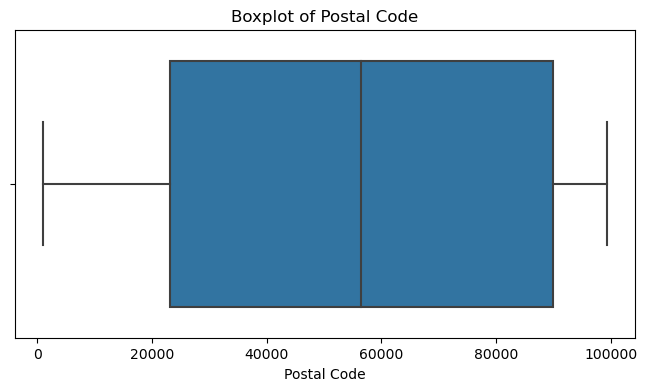

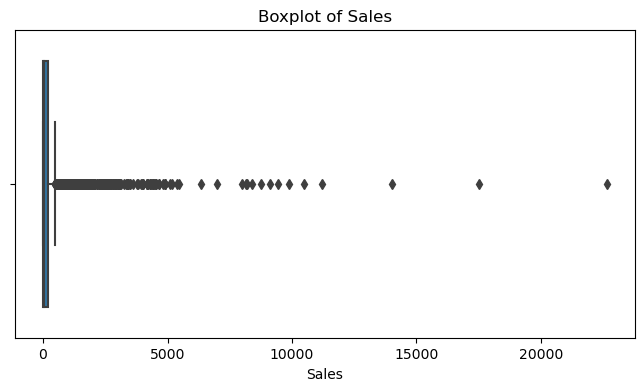

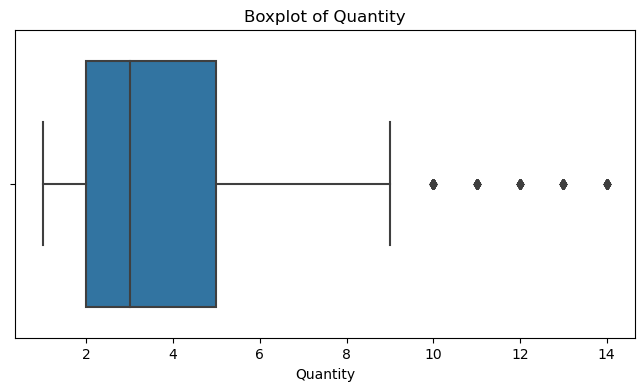

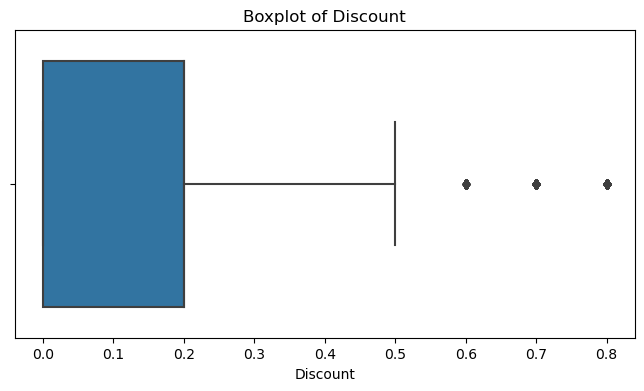

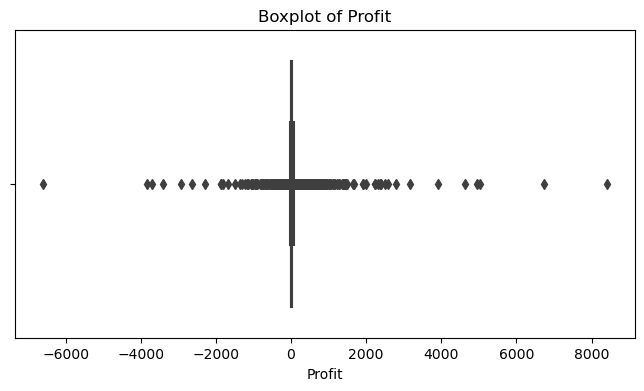

In [16]:
# 7. Outlier Analysis (boxplots)
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [17]:
# 8. Basic business questions
# Example: Which category has the most sales?
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
print("\nTotal Sales by Category:")
print(category_sales)


Total Sales by Category:
Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


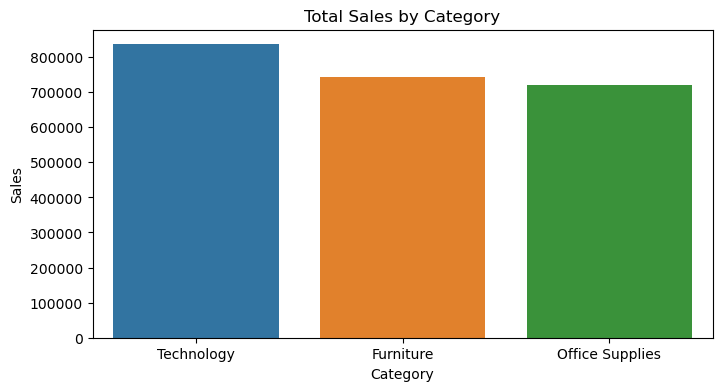

In [18]:
# Visualize it
plt.figure(figsize=(8,4))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.show()



Total Profit by Region:
Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64


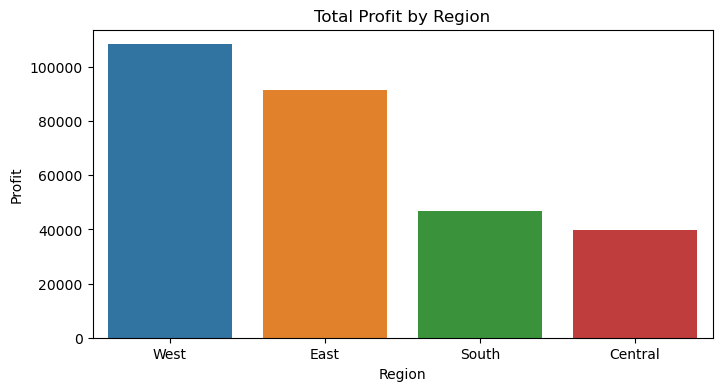

In [19]:
# Example: Which region gives more profit?
region_profit = df.groupby("Region")["Profit"].sum().sort_values(ascending=False)
print("\nTotal Profit by Region:")
print(region_profit)

plt.figure(figsize=(8,4))
sns.barplot(x=region_profit.index, y=region_profit.values)
plt.title("Total Profit by Region")
plt.ylabel("Profit")
plt.show()